In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
extractable_work = np.loadtxt("../new_data/16_c5_0False2/pops000.dat")

In [40]:
def load(num_qbits,connectivity,property,index):
    return np.loadtxt(f"../remote_data/{num_qbits}_{connectivity}_0False2/{property}{str(index).zfill(3)}.dat")

def load_all(num_qbits,connectivity,property):
    return np.array([load(num_qbits,connectivity,property,i) for i in range(100)])


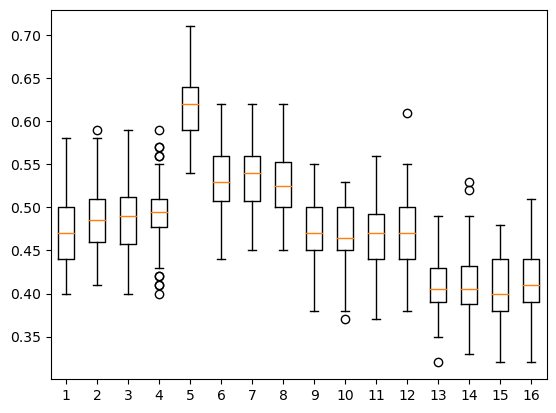

In [41]:
W = load_all(16,"c6","exwork")[:,:100,:]
dW = np.diff(W,axis = 1)
dWg0 = dW>0
percentg0 = np.sum(dWg0,axis = 1)/len(dW)
plt.boxplot(percentg0)
plt.show()

(100, 50, 16)


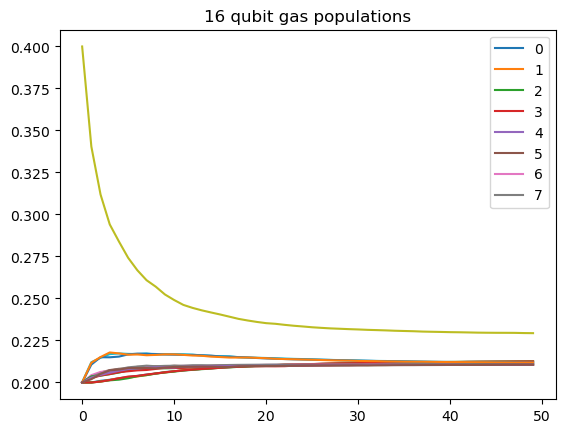

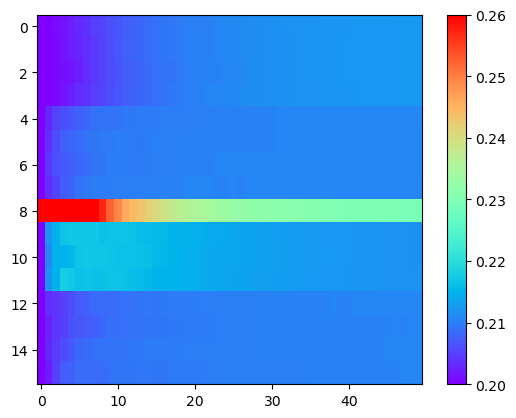

In [52]:
n = 16
p = load_all(n,"c6","pops")[:,:50,:]
print(p.shape)
avg_p = p.mean(axis=0)
# avg_p = avg_p.transpose()
avg_p = np.roll(avg_p,(n-8)//2,axis = 1)
plt.plot(avg_p,'-')
plt.legend(list(range(8)))

plt.title(f"{n} qubit gas populations")
plt.show()
avg_p = avg_p.transpose()
plt.imshow(avg_p,aspect = 3.0,interpolation = "none",vmin = .2,vmax = .26,cmap = "rainbow")
plt.colorbar()
plt.show()

In [20]:
import matplotlib.pyplot as plt
from collections import defaultdict



# Group data by desired variables
grouped_data = defaultdict(list)
for n in [8,12,16]:
    for c in ['c5','c6','c7','gas']:
        W = load_all(n,c,"exwork")[:,:3,:]
        dW = np.diff(W,axis = 1)
        dWg0 = dW>0
        percentg0 = np.sum(dWg0,axis = 1)/dW.shape[1]
        hot = percentg0[:,4]
        cold = np.delete(percentg0, 4, axis=1).flatten()
        key = (n,c,'hot')
        grouped_data[key] = hot
        key = (n,c,'cold')
        grouped_data[key] = cold


In [21]:
# Define positions and box widths for each group
positions = {}
widths = {}
group_count = 0
for key, values in grouped_data.items():
    if key[0] == 8:
        origin_1 = 0
    if key[0] == 12:
        origin_1 = 3
    if key[0] == 16:
        origin_1 = 6

    if key[2] == 'cold':
        origin_0 = 0
    if key[2] == 'hot':
        origin_0 = 10

    if key[1] == 'c5':
        origin_2 = 0
    if key[1] == 'c6':
        origin_2 = .5
    if key[1] == 'c7':
        origin_2 = 1
    if key[1] == 'gas':
        origin_2 = 1.5
        
    positions[key] = origin_0+origin_1+origin_2
    widths[key] = 0.45
    

# Define colors for different connectivity
colors = {'c5': 'red', 'c6': 'blue', 'c7': 'green','gas':'purple'}


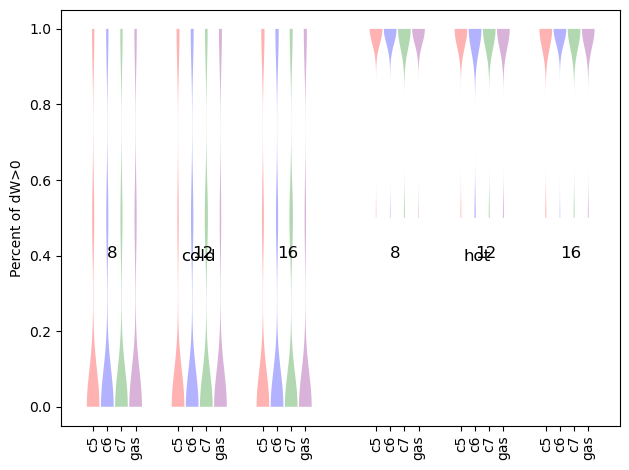

In [22]:
fig, ax = plt.subplots()

# Plot boxes for each group
for key, values in grouped_data.items():
    parts = ax.violinplot(
        values,
        positions=[positions[key]],
        widths=[widths[key]]
        
        , showmeans=False, showmedians=False
        ,showextrema=False
    )



    for pc in parts['bodies']:
        c = colors[key[1]]
        pc.set_facecolor(c)
        # pc.set_edgecolor(c)
        # pc.set_alpha(1)



# Set labels and title
# ax.set_xlabel('Subsystems (Connectivity, Temperature)')
ax.set_ylabel('Percent of dW>0')
# ax.set_title('Boxplot of Data Grouped by Subsystems, Connectivity, and Temperature')

# Set x-axis ticks and labels
x_ticks = list(positions.values())
x_labels = [f"{c}" for s, c, t in positions.keys()]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=90, ha='center')



ax.annotate('cold', (3.1, 0.385),fontsize=12, annotation_clip=False)
ax.annotate('hot', (13.1, 0.385),fontsize=12, annotation_clip=False)

ax.annotate('8', (.5, 0.395),fontsize=12, annotation_clip=False)
ax.annotate('12', (3.5, 0.395),fontsize=12, annotation_clip=False)
ax.annotate('16', (6.5, 0.395),fontsize=12, annotation_clip=False)

ax.annotate('8', (10.5, 0.395),fontsize=12, annotation_clip=False)
ax.annotate('12', (13.5, 0.395),fontsize=12, annotation_clip=False)
ax.annotate('16', (16.5, 0.395),fontsize=12, annotation_clip=False)
# Adjust layout and show plot
plt.tight_layout()
plt.show()


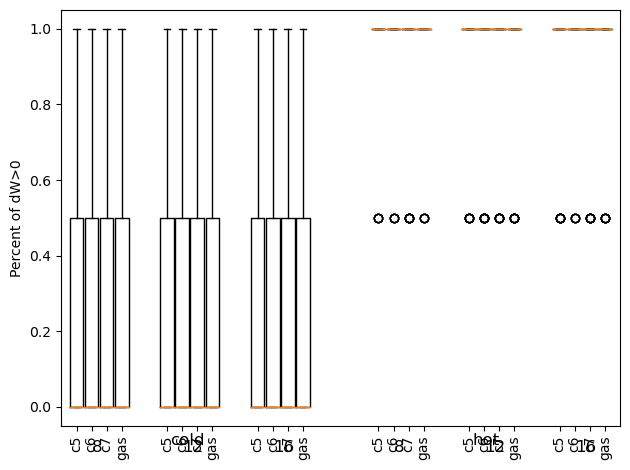

In [23]:
fig, ax = plt.subplots()

# Plot boxes for each group
for key, values in grouped_data.items():

    # print(key,values)
    parts = ax.boxplot(
        values,
        positions=[positions[key]],
        widths=[widths[key]]
        
    )



    # for pc in parts['bodies']:
    #     c = colors[key[1]]
    #     pc.set_facecolor(c)
        # pc.set_edgecolor(c)
        # pc.set_alpha(1)



# Set labels and title
# ax.set_xlabel('Subsystems (Connectivity, Temperature)')
ax.set_ylabel('Percent of dW>0')
# ax.set_title('Boxplot of Data Grouped by Subsystems, Connectivity, and Temperature')

# Set x-axis ticks and labels
x_ticks = list(positions.values())
x_labels = [f"{c}" for s, c, t in positions.keys()]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=90, ha='center')


baseline_height = ax.get_ylim()[0]




ax.annotate('cold', (3.1, baseline_height-.05),fontsize=12, annotation_clip=False)
ax.annotate('hot', (13.1, baseline_height-.05),fontsize=12, annotation_clip=False)

ax.annotate('8', (.5, baseline_height-.07),fontsize=12, annotation_clip=False)
ax.annotate('12', (3.5, baseline_height-.07),fontsize=12, annotation_clip=False)
ax.annotate('16', (6.5, baseline_height-.07),fontsize=12, annotation_clip=False)

ax.annotate('8', (10.5, baseline_height-.07),fontsize=12, annotation_clip=False)
ax.annotate('12', (13.5, baseline_height-.07),fontsize=12, annotation_clip=False)
ax.annotate('16', (16.5, baseline_height-.07),fontsize=12, annotation_clip=False)
# Adjust layout and show plot
plt.tight_layout()
plt.show()